<center><img src="Fig/UGA.png" width="30%" height="30%"></center>
<center><h3>Master of Science in Industrial and Applied Mathematics (MSIAM)  -- 1st year</h3></center>
<hr>
<center><h1>Optimization</h1></center>
<center><h2>Lab8: Variance-Reduce Stochastic Gradient</h2></center>

# Structure of an optimization program

An optimization program can be practically divided into three parts:
* the *run* environment, in which you test, run your program, and display results.
* the *problem* part, which contains the function oracles, problem constraints, etc.
* the *algorithmic* part, where the algorithms are coded.

The main interest of such division is that these parts are interchangeable, meaning that, for instance, the algorithms of the third part can be used of a variety of problems. That is why such a decomposition is widely used.

In the present lab, you will use this division:
* `8-2_VRSG.ipynb` will be the *run* environment
* `logistic_regression.ipynb` will be the considered *logistic regression problem* for this lab
* `algoProx.ipynb` will contain the proximal *algorithms* studied in this lab

---

The following script will allow you to import *notebooks* as if you imported *python files* and will have to be executed at each time you launch Jupyter notebooks.

In [1]:
import start
from imp import reload

---

# Recall of the proximal gradient algorithm



In [2]:
import algoProx             # load our algoProx module (from notebook)
reload(algoProx)            # reload the module if changed (and saved)
from algoProx import *      # import all methods of the module into the current environment

import numpy as np
import logistic_regression_2 as pb
reload(pb)

#### Parameter we give at our algorithm (see algoGradient.ipynb)
PREC    = 1e-5                     # Sought precision
ITE_MAX = 1000                      # Max number of iterations
x0      = np.zeros(pb.n)              # Initial point
step    = 1.0/pb.L

##### gradient algorithm
x,x_tab = proximal_gradient_algorithm(pb.F , pb.f_grad , pb.g_prox , x0 , step , PREC, ITE_MAX , True)



importing notebook from algoProx.ipynb
importing notebook from algoProx.ipynb
importing notebook from logistic_regression_2.ipynb
importing notebook from logistic_regression_2.ipynb
------------------------------------
 Proximal gradient algorithm
------------------------------------
START    -- stepsize = 0.0303347728135
FINISHED -- 999 iterations / 1.640920s -- final value: 0.438712




/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2018-04-09 14:33:38.021398. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


## Decrease of the algorithm.

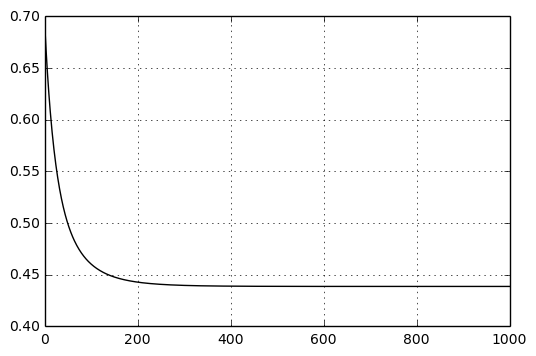

/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2018-04-09 14:33:40.781498. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [3]:
import matplotlib.pyplot as plt
% matplotlib inline

F = []
for i in range(x_tab.shape[0]):
    F.append( pb.F(x_tab[i])) 

plt.figure()
plt.plot( F, color="black", linewidth=1.0, linestyle="-")
plt.grid(True)
plt.show()

### Support of the vector $x_k$ 


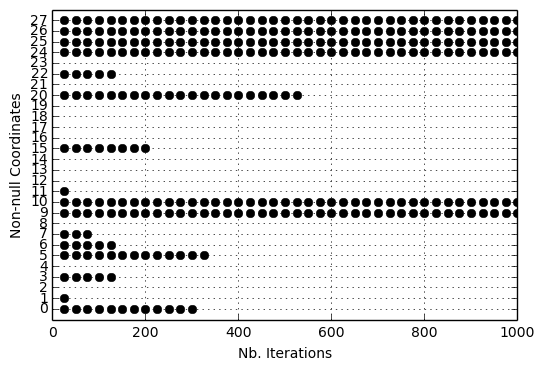

/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2018-04-09 14:34:09.229726. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [4]:
plt.figure()

for i in np.arange(0,x_tab.shape[0],int(x_tab.shape[0]/40)):
    for j in range(pb.n):
        if np.abs(x_tab[i,j])>1e-14:
            plt.plot( i , j  , 'ko')

plt.grid(True)
plt.ylabel('Non-null Coordinates')
plt.xlabel('Nb. Iterations')
plt.ylim(-1,pb.d+1)
plt.yticks(np.arange(0,pb.d+1))
plt.show()

---

# Stochastic gradient 


In the following, instead of considering $f$ as a whole, we will use its structure 
$$ f(x) := \frac{1}{m}\sum_{i=1}^m f_i(x)$$

> Implement the gradient related to $f_i$, related to one example, in [logistic_regression_2]

With this structure a popular minimization algorithm is the *stochastic gradient algorithm* which writes as follows:
* Select uniformly $i$ in $1,..,m$
* $x_{k+1} = \mathbf{prox}_{\gamma g}\left( x_k - \gamma_k \nabla f_i(x_k) \right) $

> Implement this algorithm with a stepsize vanishing as $1/k$

### Variance reduction

The poor performance of this algorithm is notably due to the variance of the gradients. In order to overcome it, *variance reduced* algorithms have been proposed.

We will consider here the popular **SAGA** algorithm  (SAGA: A fast incremental gradient method with support for non-strongly convex composite objectives
A Defazio, F Bach, S Lacoste-Julien, NIPS 2014. ) 

> Implement SAGA from the paper ( http://papers.nips.cc/paper/5258-saga-a-fast-incremental-gradient-method-with-support-for-non-strongly-convex-composite-objectives ) and compare with the stochastic gradient algorithm.
